# 05: Feature Engineering and Selection

## Overview
This notebook covers feature engineering and selection techniques essential for machine learning and deep learning.

## Topics Covered:
1. Feature Scaling
2. Feature Encoding
3. Feature Creation
4. Feature Selection Methods
5. Dimensionality Curse
6. PCA for Feature Extraction

## Focus Points:
- Understanding core concepts
- Practical implementation
- When to apply each technique
- Common pitfalls and solutions

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Libraries imported successfully')

Libraries imported successfully


## Key Concepts

This notebook covers:

- Feature scaling (StandardScaler, MinMaxScaler)
- Encoding categorical variables
- Creating polynomial features
- SelectKBest, RFE
- Variance thresholding

## Implementation Examples

The following sections provide practical implementations of the concepts above.

In [7]:
# Example 1: Basic setup and data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training samples: {len(X_train)}')
print(f'Test samples: {len(X_test)}')
print(f'Number of features: {X.shape[1]}')

Training samples: 800
Test samples: 200
Number of features: 20


## 1. Feature Scaling

Original data statistics:
              income          age  credit_score
count    1000.000000  1000.000000   1000.000000
mean    48625.297398    48.381000    583.477000
std     48625.494308    17.817612    157.016992
min       232.139203    18.000000    300.000000
25%     13457.826466    32.000000    447.000000
50%     34339.130862    48.000000    582.000000
75%     68191.510430    64.000000    723.000000
max    408622.279891    79.000000    849.000000


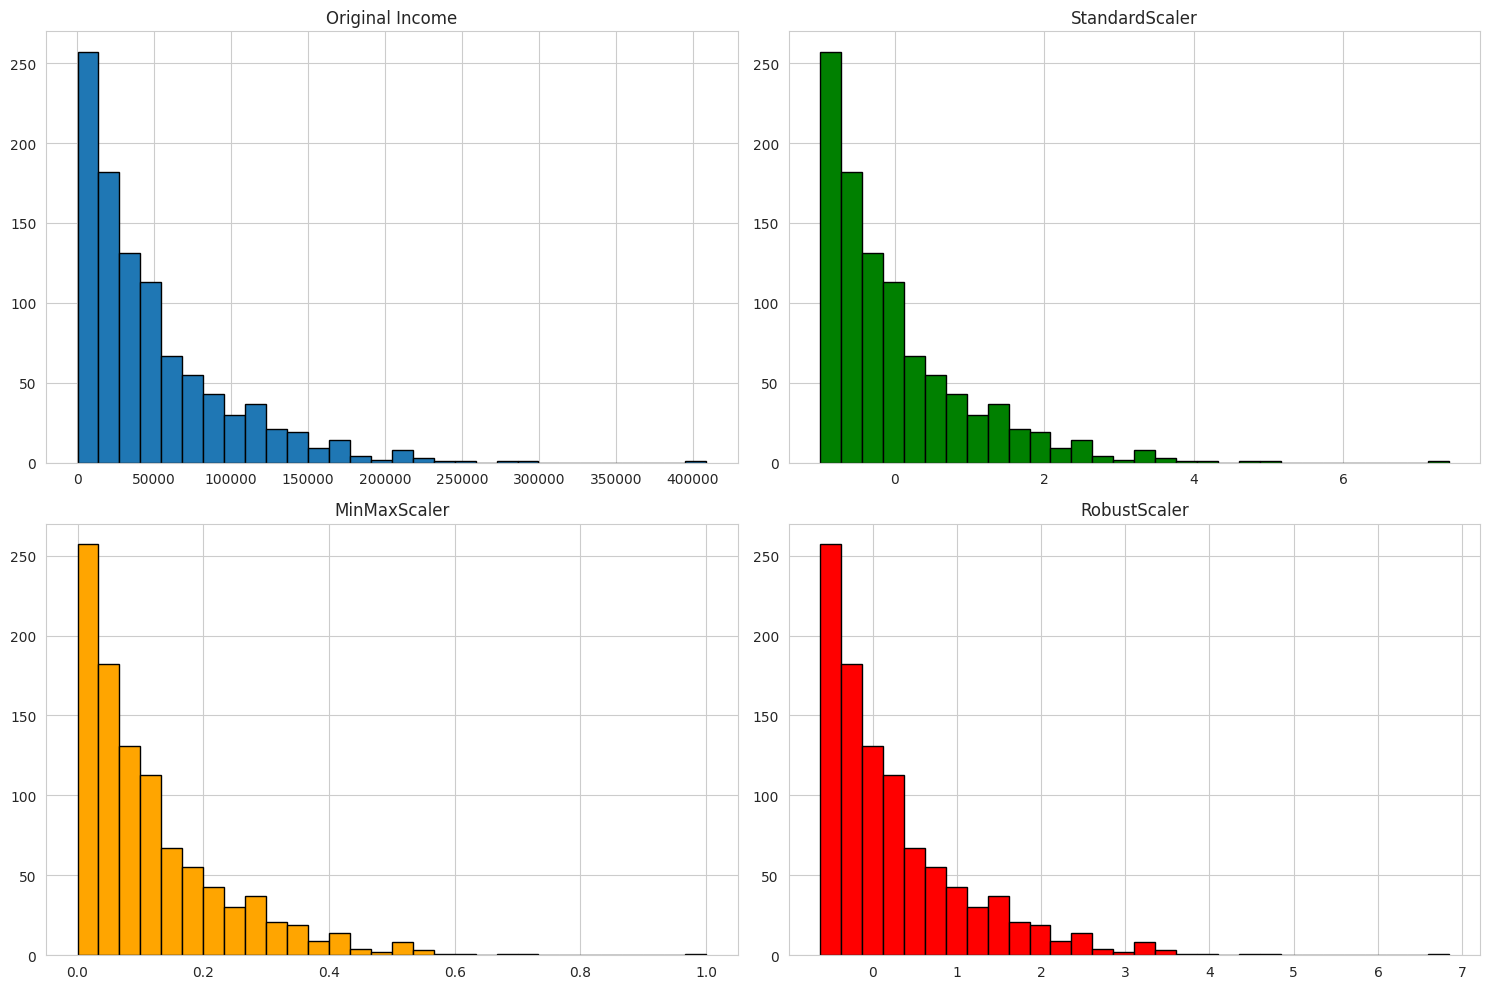


StandardScaler statistics:
             income           age  credit_score
count  1.000000e+03  1.000000e+03  1.000000e+03
mean   3.197442e-17 -1.332268e-17  1.563194e-16
std    1.000500e+00  1.000500e+00  1.000500e+00
min   -9.957199e-01 -1.705964e+00 -1.806294e+00
25%   -7.235930e-01 -9.198313e-01 -8.696211e-01
50%   -2.939469e-01 -2.139404e-02 -9.411332e-03
75%    4.025872e-01  8.770432e-01  8.890300e-01
max    7.407166e+00  1.719328e+00  1.691892e+00


In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')

# Create sample data
np.random.seed(42)
data = pd.DataFrame({
    'income': np.random.exponential(50000, 1000),
    'age': np.random.randint(18, 80, 1000),
    'credit_score': np.random.randint(300, 850, 1000)
})

print('Original data statistics:')
print(data.describe())

# Standard Scaler (z-score normalization)
scaler_std = StandardScaler()
data_std = pd.DataFrame(scaler_std.fit_transform(data), columns=data.columns)

# Min-Max Scaler
scaler_minmax = MinMaxScaler()
data_minmax = pd.DataFrame(scaler_minmax.fit_transform(data), columns=data.columns)

# Robust Scaler (resistant to outliers)
scaler_robust = RobustScaler()
data_robust = pd.DataFrame(scaler_robust.fit_transform(data), columns=data.columns)

# Visualize scaling effects
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
data['income'].hist(ax=axes[0,0], bins=30, edgecolor='black')
axes[0,0].set_title('Original Income')
data_std['income'].hist(ax=axes[0,1], bins=30, edgecolor='black', color='green')
axes[0,1].set_title('StandardScaler')
data_minmax['income'].hist(ax=axes[1,0], bins=30, edgecolor='black', color='orange')
axes[1,0].set_title('MinMaxScaler')
data_robust['income'].hist(ax=axes[1,1], bins=30, edgecolor='black', color='red')
axes[1,1].set_title('RobustScaler')
plt.tight_layout()
plt.show()

print('\nStandardScaler statistics:')
print(data_std.describe())

## 2. Encoding Categorical Variables

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Sample categorical data
df_cat = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'size': ['small', 'medium', 'large', 'medium', 'small', 'large'],
    'price': [10, 20, 30, 15, 12, 35]
})

print('Original data:')
print(df_cat)

# Label Encoding
le = LabelEncoder()
df_cat['color_label'] = le.fit_transform(df_cat['color'])
print('\nLabel Encoding:')
print(df_cat[['color', 'color_label']])

# One-Hot Encoding
df_onehot = pd.get_dummies(df_cat, columns=['color', 'size'], prefix=['color', 'size'])
print('\nOne-Hot Encoding:')
print(df_onehot.head())

# Ordinal Encoding (for ordered categories)
size_order = [['small', 'medium', 'large']]
oe = OrdinalEncoder(categories=size_order)
df_cat['size_ordinal'] = oe.fit_transform(df_cat[['size']])
print('\nOrdinal Encoding (size):')
print(df_cat[['size', 'size_ordinal']])

Original data:
   color    size  price
0    red   small     10
1   blue  medium     20
2  green   large     30
3    red  medium     15
4   blue   small     12
5  green   large     35

Label Encoding:
   color  color_label
0    red            2
1   blue            0
2  green            1
3    red            2
4   blue            0
5  green            1

One-Hot Encoding:
   price  color_label  color_blue  color_green  color_red  size_large  \
0     10            2       False        False       True       False   
1     20            0        True        False      False       False   
2     30            1       False         True      False        True   
3     15            2       False        False       True       False   
4     12            0        True        False      False       False   

   size_medium  size_small  
0        False        True  
1         True       False  
2        False       False  
3         True       False  
4        False        True  

Ordinal Encod

## 3. Feature Selection Methods

SelectKBest:
Original features: 20
Selected features: 10
Selected feature indices: [ 0  3  4  6  7  8 10 13 14 18]

Recursive Feature Elimination:
Selected features: 10
Feature ranking: [ 1 11  1  3  7  4  1  1  2  5  6  9  1  1  1  1  1  8  1 10]

Variance Threshold:
Features after variance threshold: 20


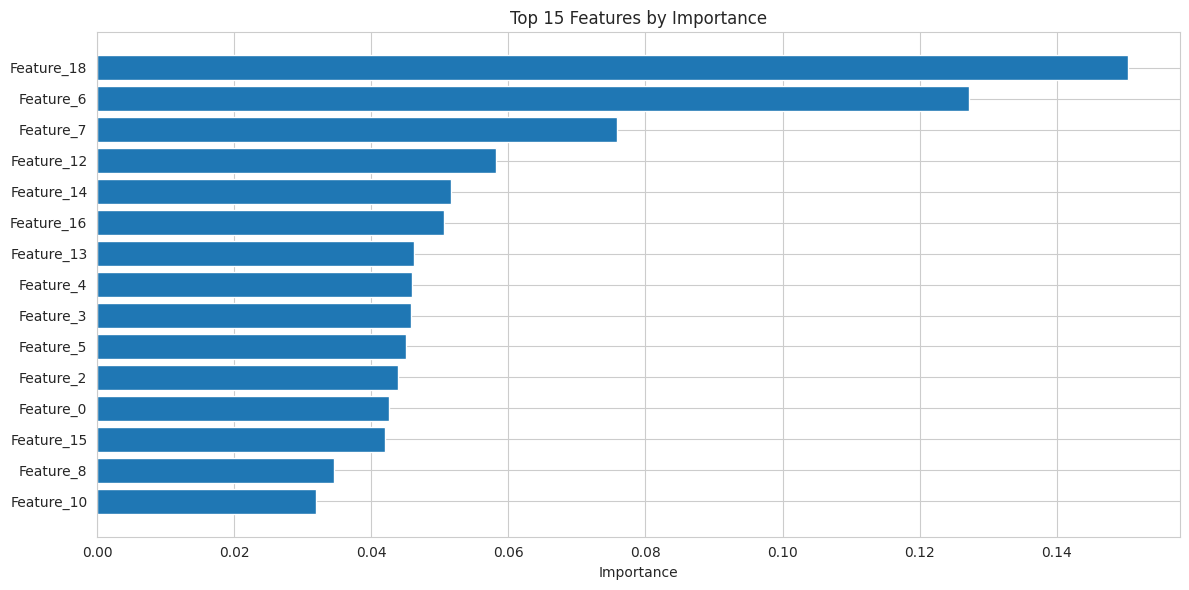

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=500, n_features=20, n_informative=10, 
                          n_redundant=5, n_repeated=2, random_state=42)

# Method 1: SelectKBest
selector_kbest = SelectKBest(f_classif, k=10)
X_kbest = selector_kbest.fit_transform(X, y)
print('SelectKBest:')
print(f'Original features: {X.shape[1]}')
print(f'Selected features: {X_kbest.shape[1]}')
print(f'Selected feature indices: {selector_kbest.get_support(indices=True)}')

# Method 2: Recursive Feature Elimination (RFE)
estimator = RandomForestClassifier(n_estimators=50, random_state=42)
selector_rfe = RFE(estimator, n_features_to_select=10, step=1)
X_rfe = selector_rfe.fit_transform(X, y)
print('\nRecursive Feature Elimination:')
print(f'Selected features: {X_rfe.shape[1]}')
print(f'Feature ranking: {selector_rfe.ranking_}')

# Method 3: Variance Threshold
selector_var = VarianceThreshold(threshold=0.1)
X_var = selector_var.fit_transform(X)
print('\nVariance Threshold:')
print(f'Features after variance threshold: {X_var.shape[1]}')

# Feature importance from Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.DataFrame({
    'feature': [f'Feature_{i}' for i in range(X.shape[1])],
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(range(15), feature_importance['importance'].head(15))
plt.yticks(range(15), feature_importance['feature'].head(15))
plt.xlabel('Importance')
plt.title('Top 15 Features by Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 4. Creating New Features

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features
X_sample = np.array([[1, 2], [3, 4], [5, 6]])
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_sample)

print('Original features:')
print(X_sample)
print('\nPolynomial features (degree=2):')
print(X_poly)
print('\nFeature names:')
print(poly.get_feature_names_out(['x1', 'x2']))

# Domain-specific feature engineering example
df_dates = pd.DataFrame({
    'date': pd.date_range('2023-01-01', periods=100),
    'sales': np.random.randint(100, 1000, 100)
})

# Extract time-based features
df_dates['year'] = df_dates['date'].dt.year
df_dates['month'] = df_dates['date'].dt.month
df_dates['day'] = df_dates['date'].dt.day
df_dates['dayofweek'] = df_dates['date'].dt.dayofweek
df_dates['is_weekend'] = df_dates['dayofweek'].isin([5, 6]).astype(int)

print('\nTime-based feature engineering:')
print(df_dates.head())

Original features:
[[1 2]
 [3 4]
 [5 6]]

Polynomial features (degree=2):
[[ 1.  2.  1.  2.  4.]
 [ 3.  4.  9. 12. 16.]
 [ 5.  6. 25. 30. 36.]]

Feature names:
['x1' 'x2' 'x1^2' 'x1 x2' 'x2^2']

Time-based feature engineering:
        date  sales  year  month  day  dayofweek  is_weekend
0 2023-01-01    765  2023      1    1          6           1
1 2023-01-02    403  2023      1    2          0           0
2 2023-01-03    719  2023      1    3          1           0
3 2023-01-04    847  2023      1    4          2           0
4 2023-01-05    919  2023      1    5          3           0


## Best Practices

1. Always split data before preprocessing
2. Use cross-validation for model evaluation
3. Monitor for overfitting/underfitting
4. Document hyperparameters and experiments
5. Start simple, then add complexity

## Questions & Answers

### Q1: What are the main concepts in Feature Engineering and Selection?
**Answer:** Feature Scaling, Feature Encoding, Feature Creation

### Q2: When should you apply these techniques?
**Answer:** Apply when you need to improve model performance, reduce dimensionality, or extract meaningful patterns from data.

### Q3: What are common challenges?
**Answer:** Common challenges include overfitting, computational complexity, hyperparameter tuning, and interpretation of results.



## Additional Resources

- Scikit-learn documentation
- TensorFlow and PyTorch tutorials
- Relevant research papers
- Online courses and books

## Practice Exercises

1. Implement the core algorithms from scratch
2. Compare performance across different methods
3. Tune hyperparameters systematically
4. Apply to real-world datasets
5. Analyze and interpret results
